<a href="https://colab.research.google.com/github/sushrut022003/OIBSIP2/blob/main/customersatisfaction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
data = pd.read_csv("/content/ifood_df.csv")
data.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0


In [3]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  AcceptedCmp3         

In [4]:
# Check the dimensions of the dataset (number of rows and columns)
print("\033[1mDimensions of the dataset:\033[0m", data.shape)


Dimensions of the dataset: (2205, 39)


In [5]:
# Check for missing values in each column
print("\033[1mMissing values in each column:\033[0m")
print(data.isnull().sum())

Missing values in each column:
Income                  0
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Age                     0
Customer_Days           0
marital_Divorced        0
marital_Married         0
marital_Single          0
marital_Together        0
marital_Widow           0
education_2n Cycle      0
education_Basic         0
education_Graduation    0
education_Master        0
education_PhD           0
MntTotal                0
MntRegu

In [6]:
# Check for duplicate rows
print("\033[1mNumber of duplicate rows:\033[0m", data.duplicated().sum())

Number of duplicate rows: 184


In [7]:
data.describe()


,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,...,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.00000
mean,51622.094785,0.442177,0.506576,49.009070,306.164626,26.403175,165.312018,37.756463,27.128345,44.057143,...,0.257596,0.034467,0.089796,0.024490,0.504762,0.165079,0.215873,562.764626,518.707483,0.29932
std,20713.063826,0.537132,0.544380,28.932111,337.493839,39.784484,217.784507,54.824635,41.130468,51.736211,...,0.437410,0.182467,0.285954,0.154599,0.500091,0.371336,0.411520,575.936911,553.847248,0.68044
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,-283.000000,0.00000
25%,35196.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,56.000000,42.000000,0.00000
50%,51287.000000,0.000000,0.000000,49.000000,178.000000,8.000000,68.000000,12.000000,8.000000,25.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,343.000000,288.000000,0.00000
75%,68281.000000,1.000000,1.000000,74.000000,507.000000,33.000000,232.000000,50.000000,34.000000,56.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,964.000000,884.000000,0.00000
max,113734.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2491.000000,2458.000000,4.00000


In [8]:
#Median
print("\033[1mMedian of each numerical column:\033[0m")
print(data.median())

Median of each numerical column:
Income                  51287.0
Kidhome                     0.0
Teenhome                    0.0
Recency                    49.0
MntWines                  178.0
MntFruits                   8.0
MntMeatProducts            68.0
MntFishProducts            12.0
MntSweetProducts            8.0
MntGoldProds               25.0
NumDealsPurchases           2.0
NumWebPurchases             4.0
NumCatalogPurchases         2.0
NumStorePurchases           5.0
NumWebVisitsMonth           6.0
AcceptedCmp3                0.0
AcceptedCmp4                0.0
AcceptedCmp5                0.0
AcceptedCmp1                0.0
AcceptedCmp2                0.0
Complain                    0.0
Z_CostContact               3.0
Z_Revenue                  11.0
Response                    0.0
Age                        50.0
Customer_Days            2515.0
marital_Divorced            0.0
marital_Married             0.0
marital_Single              0.0
marital_Together            0.0
marital

In [9]:
#Standard deviation
print("\033[1mStandard deviation of each numerical column:\033[0m")
print(data.std())

Standard deviation of each numerical column:
Income                  20713.063826
Kidhome                     0.537132
Teenhome                    0.544380
Recency                    28.932111
MntWines                  337.493839
MntFruits                  39.784484
MntMeatProducts           217.784507
MntFishProducts            54.824635
MntSweetProducts           41.130468
MntGoldProds               51.736211
NumDealsPurchases           1.886107
NumWebPurchases             2.737424
NumCatalogPurchases         2.798647
NumStorePurchases           3.241796
NumWebVisitsMonth           2.413535
AcceptedCmp3                0.261705
AcceptedCmp4                0.262442
AcceptedCmp5                0.260222
AcceptedCmp1                0.245518
AcceptedCmp2                0.115872
Complain                    0.094827
Z_CostContact               0.000000
Z_Revenue                   0.000000
Response                    0.358150
Age                        11.705801
Customer_Days             202.

In [10]:
#Variance
print("\033[1mVariance of each numerical column:\033[0m")
print(data.var())


Variance of each numerical column:
Income                  4.290310e+08
Kidhome                 2.885107e-01
Teenhome                2.963497e-01
Recency                 8.370671e+02
MntWines                1.139021e+05
MntFruits               1.582805e+03
MntMeatProducts         4.743009e+04
MntFishProducts         3.005741e+03
MntSweetProducts        1.691715e+03
MntGoldProds            2.676636e+03
NumDealsPurchases       3.557398e+00
NumWebPurchases         7.493489e+00
NumCatalogPurchases     7.832425e+00
NumStorePurchases       1.050924e+01
NumWebVisitsMonth       5.825153e+00
AcceptedCmp3            6.848937e-02
AcceptedCmp4            6.887580e-02
AcceptedCmp5            6.771527e-02
AcceptedCmp1            6.027919e-02
AcceptedCmp2            1.342642e-02
Complain                8.992103e-03
Z_CostContact           0.000000e+00
Z_Revenue               0.000000e+00
Response                1.282714e-01
Age                     1.370258e+02
Customer_Days           4.103203e+04
mar

In [11]:
#Skewness
print("\033[1mSkewness of each numerical column:\033[0m")
print(data.skew())

Skewness of each numerical column:
Income                   0.013164
Kidhome                  0.635495
Teenhome                 0.404623
Recency                 -0.001874
MntWines                 1.166917
MntFruits                2.099281
MntMeatProducts          1.818916
MntFishProducts          1.912028
MntSweetProducts         2.098355
MntGoldProds             1.834468
NumDealsPurchases        2.312369
NumWebPurchases          1.201376
NumCatalogPurchases      1.368122
NumStorePurchases        0.706960
NumWebVisitsMonth        0.229994
AcceptedCmp3             3.259123
AcceptedCmp4             3.246508
AcceptedCmp5             3.284676
AcceptedCmp1             3.551642
AcceptedCmp2             8.402967
Complain                10.363651
Z_CostContact            0.000000
Z_Revenue                0.000000
Response                 1.950559
Age                      0.089941
Customer_Days           -0.019176
marital_Divorced         2.590858
marital_Married          0.463015
marital_Singl

In [12]:
#Kurtosis
print("\033[1mKurtosis of each numerical column:\033[0m")
print(data.kurtosis())

Kurtosis of each numerical column:
Income                   -0.847564
Kidhome                  -0.789442
Teenhome                 -0.989633
Recency                  -1.198443
MntWines                  0.574909
MntFruits                 4.050778
MntMeatProducts           3.248138
MntFishProducts           3.056338
MntSweetProducts          4.079829
MntGoldProds              3.143759
NumDealsPurchases         8.186671
NumWebPurchases           4.101823
NumCatalogPurchases       3.210414
NumStorePurchases        -0.635247
NumWebVisitsMonth         1.904398
AcceptedCmp3              8.629707
AcceptedCmp4              8.547565
AcceptedCmp5              8.797075
AcceptedCmp1             10.623796
AcceptedCmp2             68.672133
Complain                105.500953
Z_CostContact             0.000000
Z_Revenue                 0.000000
Response                  1.806319
Age                      -0.797036
Customer_Days            -1.202857
marital_Divorced          4.716821
marital_Married     

In [13]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [15]:
# Select relevant features for clustering
selected_features = ['Income', 'Recency', 'MntWines', 'MntFruits','MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
# Standardize the selected features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[selected_features])

In [17]:
# Determine the optimal number of clusters using silhouette score
silhouette_scores = []
for k in range(2, 11):kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(data_scaled)
silhouette_scores.append((k, silhouette_score(data_scaled, kmeans.labels_)))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [18]:
# Choose the optimal number of clusters based on the highest silhouette score
optimal_num_clusters = max(silhouette_scores, key=lambda x: x[1])[0]
# Perform K-means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_num_clusters, random_state=42)
kmeans.fit(data_scaled)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=10, random_state=42)

In [19]:
KMeans(n_clusters=2, random_state=42)


KMeans(n_clusters=2, random_state=42)

In [20]:
# Add cluster labels to the original dataset
data['Cluster'] = kmeans.labels_
# Display the cluster centers
cluster_centers = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=selected_features)

print("\033[1mCluster centers:\033[0m")
print(cluster_centers)


Cluster centers:
         Income    Recency    MntWines   MntFruits  MntMeatProducts  \
0  37795.539855  76.748188   81.855072    6.081522        34.181159   
1  76307.112903  45.145161  613.983871   92.016129       536.758065   
2  75391.235849  46.622642  526.820755  141.150943       439.009434   
3  59422.923664  54.931298  529.969466   27.106870       176.389313   
4  78893.606897  59.144828  720.779310   48.889655       645.455172   
5  30572.225000  25.983333   30.420833    4.245833        17.502083   
6  65309.654054  38.113514  370.497297   53.789189       229.291892   
7  68351.934426  56.016393  861.732240   22.704918       201.765027   
8  54879.833977  26.351351  271.722008    9.648649        81.776062   
9  73900.568627  54.784314  498.460784   48.156863       394.215686   

   MntFishProducts  MntSweetProducts  MntGoldProds  
0         8.074275          6.201087     18.262681  
1       189.354839         50.145161    163.161290  
2       108.132075        101.367925     6

In [21]:
# Display the number of customers in each cluster
print("\033[1mNumber of customers in each cluster:\033[0m")
print(data['Cluster'].value_counts())

Number of customers in each cluster:
0    552
5    480
8    259
6    185
7    183
4    145
3    131
2    106
9    102
1     62
Name: Cluster, dtype: int64


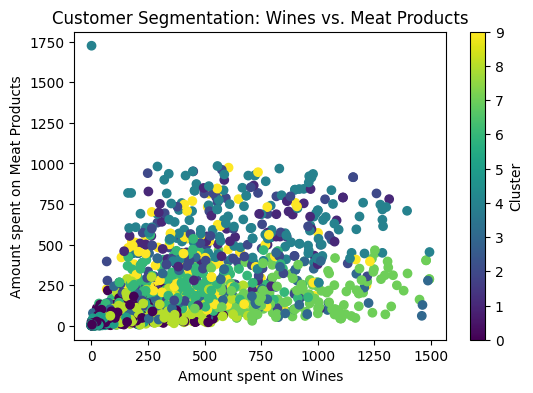

In [22]:
# Scatter plot of two features colored by cluster
plt.figure(figsize=(6, 4))
plt.scatter(data['MntWines'], data['MntMeatProducts'], c=data['Cluster'],cmap='viridis')
plt.xlabel('Amount spent on Wines')
plt.ylabel('Amount spent on Meat Products')
plt.title('Customer Segmentation: Wines vs. Meat Products')
plt.colorbar(label='Cluster')
plt.show()


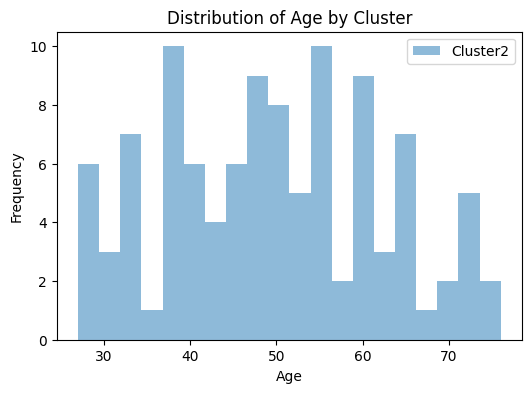

In [24]:
# Create histograms of customer age for each cluster
plt.figure(figsize=(6, 4))
for cluster_label in data['Cluster'].unique():cluster_data = data[data['Cluster'] == cluster_label]
plt.hist(cluster_data['Age'], bins=20, alpha=0.5, label=f'Cluster{cluster_label}')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age by Cluster')
plt.legend()
plt.show()

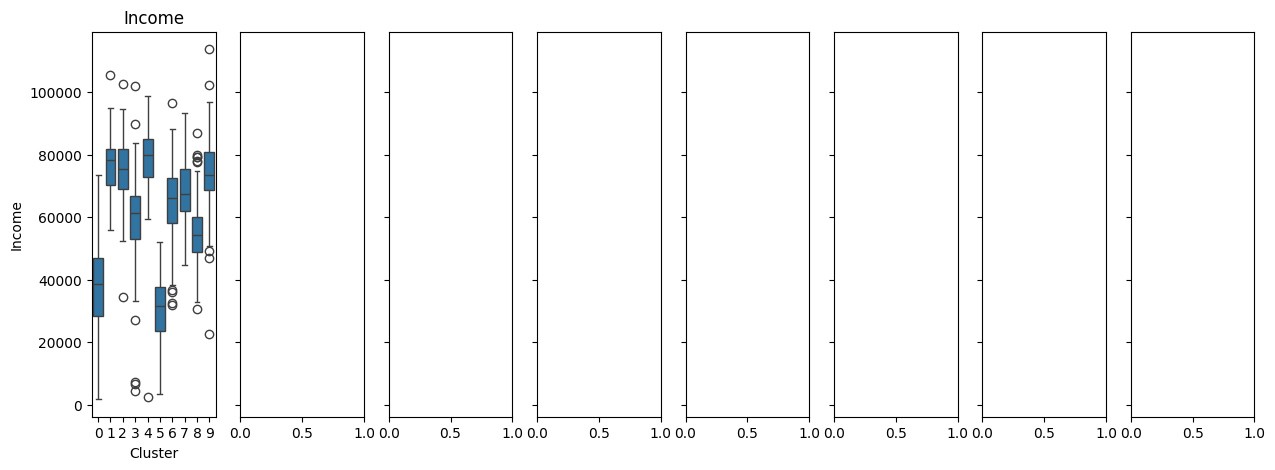

In [28]:
# Create box plots of spending on different products for each cluster
fig, axes = plt.subplots(1, len(selected_features), figsize=(15, 5),sharey=True)
for i, feature in enumerate(selected_features):
    sns.boxplot(x='Cluster', y=feature, data=data, ax=axes[i])
    axes[i].set_title(f'{feature}')
    plt.show()

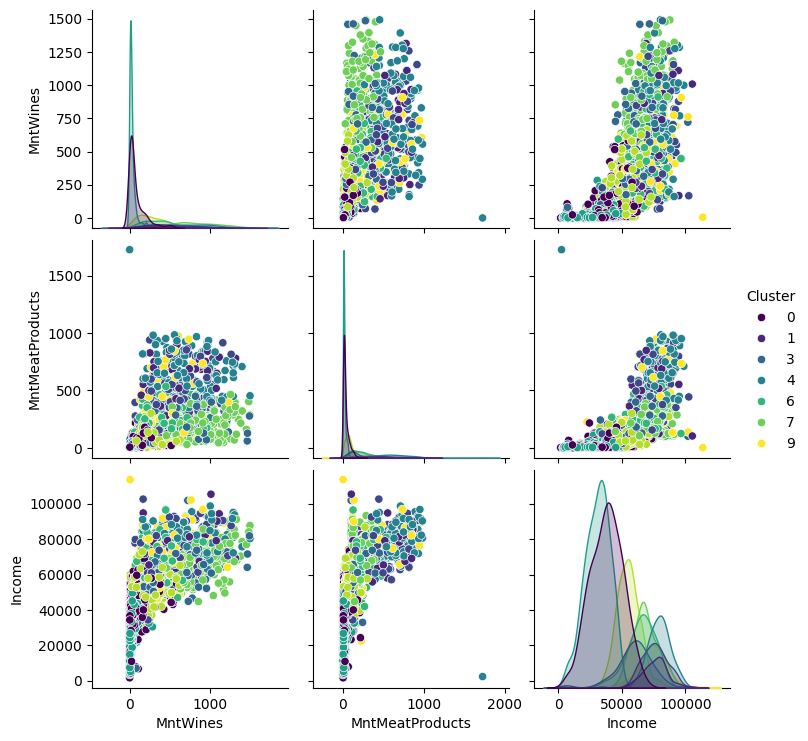

In [29]:
# Create a pairplot colored by cluster
sns.pairplot(data, vars=['MntWines', 'MntMeatProducts', 'Income'],hue='Cluster', palette='viridis')
plt.show()